In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
data_dir='D:\\Msc GU\\Msc 4th Sem\\Project\\DataSet\\teadataset'

In [4]:
# Set up data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Load in the dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [5]:
batch_size=16

In [6]:
# Step 1: Choose a pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Load the pre-trained model
model = Sequential()
model.add(base_model)

# Step 3: Freeze initial layers
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Add new classification layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))  # Adjust the number of output classes



In [7]:
# Step 5: Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(
    train_data,
    epochs=50,
    batch_size=batch_size,
    validation_data=val_data
)

Epoch 1/50
23/23 [==============================] - 271s 12s/step - loss: 3.2872 - accuracy: 0.2475 - val_loss: 1.7579 - val_accuracy: 0.4138
Epoch 2/50
23/23 [==============================] - 1599s 72s/step - loss: 1.2692 - accuracy: 0.5274 - val_loss: 1.4789 - val_accuracy: 0.4598
Epoch 3/50
23/23 [==============================] - 588s 26s/step - loss: 1.0696 - accuracy: 0.5921 - val_loss: 1.2431 - val_accuracy: 0.5172
Epoch 4/50
23/23 [==============================] - 641s 28s/step - loss: 0.8926 - accuracy: 0.6835 - val_loss: 0.9898 - val_accuracy: 0.5862
Epoch 5/50
23/23 [==============================] - 624s 28s/step - loss: 0.8583 - accuracy: 0.6948 - val_loss: 1.1079 - val_accuracy: 0.5575
Epoch 6/50
23/23 [==============================] - 596s 26s/step - loss: 0.7532 - accuracy: 0.7201 - val_loss: 1.0347 - val_accuracy: 0.5920
Epoch 7/50
23/23 [==============================] - 597s 26s/step - loss: 0.6242 - accuracy: 0.7778 - val_loss: 1.0096 - val_accuracy: 0.6379
Epoch

In [9]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()



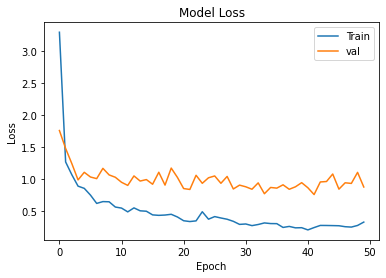

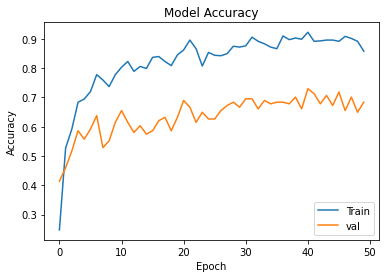

In [10]:
plot_loss(history)
plot_accuracy(history)

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [12]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 191s 11s/step - loss: 0.4522 - accuracy: 0.8409
Test Loss: 0.45219409465789795
Test Accuracy: 0.8409090638160706


In [13]:
# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 195s 11s/step


In [14]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 4  4  3  8 12  5  8 16]
 [ 7  5 10 10  7  5 13 10]
 [ 6 10  7  4  8  4  7 14]
 [10  8  3  6 10  7 11 12]
 [ 9  8  5  5  9  6 10  8]
 [ 5  6  4  5  6  1  8  9]
 [13 16  5  8 13  9 10 11]
 [12 11  4 11 11  6 16 14]]


1/1 [==============================] - 11s 11s/step


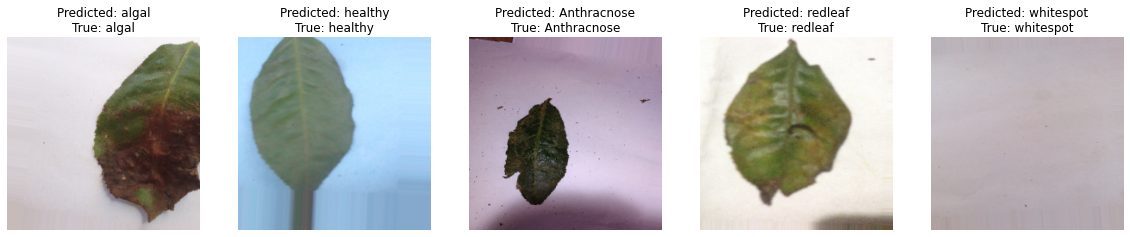

In [15]:
import matplotlib.pyplot as plt

# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(8, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model2.fit(train_data, epochs=30,batch_size=32, validation_data=val_data)

            

Epoch 1/30
23/23 [==============================] - 183s 8s/step - loss: 3.1192 - accuracy: 0.2447 - val_loss: 1.3793 - val_accuracy: 0.3678
Epoch 2/30
23/23 [==============================] - 127s 6s/step - loss: 1.2136 - accuracy: 0.4233 - val_loss: 1.2303 - val_accuracy: 0.3621
Epoch 3/30
23/23 [==============================] - 120s 5s/step - loss: 1.1214 - accuracy: 0.5176 - val_loss: 1.2442 - val_accuracy: 0.4080
Epoch 4/30
23/23 [==============================] - 128s 6s/step - loss: 0.9894 - accuracy: 0.5274 - val_loss: 1.2272 - val_accuracy: 0.4310
Epoch 5/30
23/23 [==============================] - 113s 5s/step - loss: 0.9804 - accuracy: 0.5387 - val_loss: 1.0484 - val_accuracy: 0.5862
Epoch 6/30
23/23 [==============================] - 133s 6s/step - loss: 0.9178 - accuracy: 0.6174 - val_loss: 1.2062 - val_accuracy: 0.4195
Epoch 7/30
23/23 [==============================] - 124s 6s/step - loss: 0.9052 - accuracy: 0.6006 - val_loss: 1.0246 - val_accuracy: 0.6092
Epoch 8/30
23

In [22]:
score = model2.evaluate(val_data)
            results.append(score[1])

IndentationError: unexpected indent (2121924891.py, line 2)

In [ ]:
# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()